# EDA 
For WELFake_for_modeling.csv

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [27]:
df = pd.read_csv("../../data_for_modeling/WELFake_for_modeling.csv")

In [11]:
df.sample(10)

,text,fake
4519,R.I.P. GOP White House Dreams? U.S. Jobs Haven...,0
25015,ECONOMIC SYSTEMS BRILLIANTLY EXPLAINED WITH CO...,0
58264,"Trump, a Free-Form Leader, Experiments and Inv...",1
61575,House Republican leader says 'easier' if Sessi...,1
56671,Catalonia's High Court asks Spanish police to ...,1
27830,GUESS WHERE THE BALTIMORE SCHOOL SYSTEM RANKS ...,0
6421,Donald Trump Close to Picking Ben Carson as Ho...,1
26739,Top House Republican condemns reported U.S. pu...,1
8219,Hate Your Job? Try These Survival Skills - The...,1
42924,Democrats Confront F.B.I. Chief at Closed-Door...,1


In [12]:
df.head()

,text,fake
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,0
1,Did they post their votes for Hillary already?,0
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,0
3,"Bobby Jindal, raised Hindu, uses story of Chri...",1
4,SATAN 2: Russia unvelis an image of its terrif...,0


In [13]:
df.shape

(63673, 2)

Text(0, 0.5, 'Count')

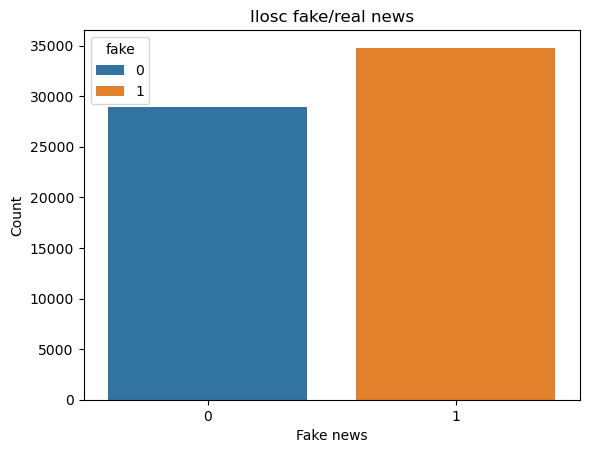

In [23]:
sns.countplot(data=df, x='fake', hue='fake')
plt.title("Ilosc fake/real news")
plt.xlabel("Fake news")
plt.ylabel("Count")

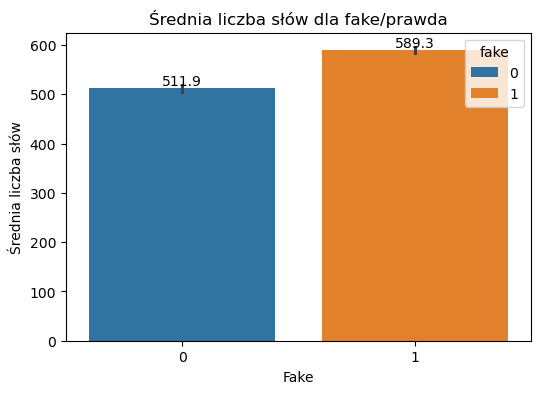

In [26]:
count_of_words = [len(x) for x in df['text'].str.split()]
words_df = pd.DataFrame([count_of_words, df['fake']]).transpose()
words_df.columns = ['count', 'fake']
words_df
plt.figure(figsize=(6,4))
ax = sns.barplot(data=words_df, x="fake", y="count", estimator="mean", hue='fake')

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", label_type="edge")

plt.xlabel("Fake")
plt.ylabel("Średnia liczba słów")
plt.title("Średnia liczba słów dla fake/prawda")
plt.show()

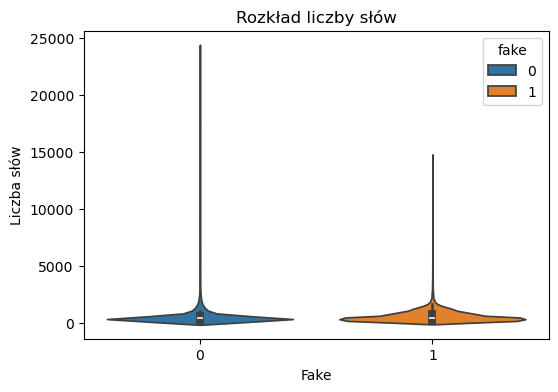

In [32]:
plt.figure(figsize=(6,4))
sns.violinplot(data=words_df, x="fake", y="count", inner="box", hue='fake')

plt.xlabel("Fake")
plt.ylabel("Liczba słów")
plt.title("Rozkład liczby słów")
plt.show()

In [48]:
df['chars'] = df['text'].apply(len)
df['sentences'] = df['text'].apply(lambda corpus: nltk.sent_tokenize(corpus)).apply(len)
df['words'] = df['text'].apply(lambda document: nltk.word_tokenize(document)).apply(len)


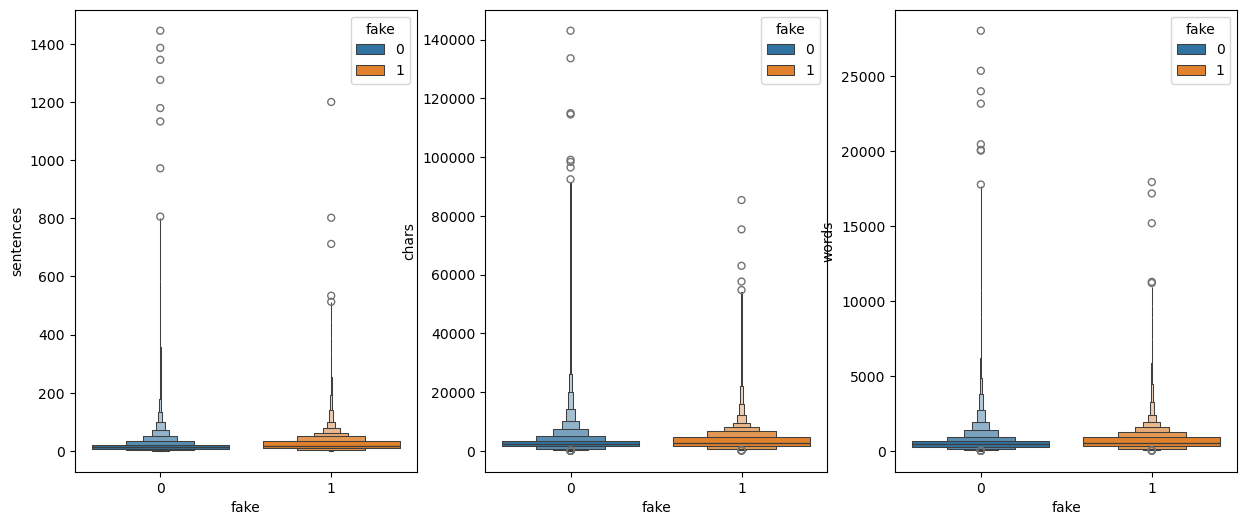

In [ ]:
value_vars = ['sentences', 'chars', 'words']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
for idx, var in enumerate(value_vars):
    sns.boxenplot(ax=ax[idx], x='fake', y=var, data=df, hue='fake')
plt.show()